# **Pattern and Anomaly Detection Practical Exam - December 2021**

### **Experiment No. 6: Anomaly Detection using ARIMA**

Name: Reeha Parkar

Sap Id: 60001180046

Date: 21 December 2021

Batch: AIML1

Class: BE Electronics

### **Getting the dataset and exploring it:**

In [1]:
from google.colab import files
test = files.upload()

Saving Exp_6.csv to Exp_6.csv


In [2]:
import pandas as pd
import io
data = pd.read_csv(io.BytesIO(test['Exp_6.csv']), index_col='DATE', parse_dates=True)

In [5]:
print(data.head())

            MinTemp  MaxTemp  AvgTemp
DATE                                 
2014-01-01     33.0     46.0     40.0
2014-01-02     35.0     50.0     43.0
2014-01-03     36.0     45.0     41.0
2014-01-04     32.0     41.0     37.0
2014-01-05     24.0     38.0     31.0


In [7]:
print(data.shape)

(1825, 3)


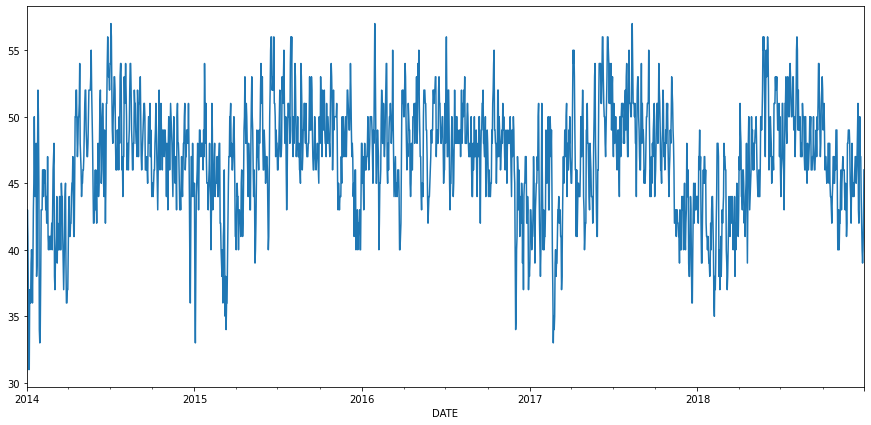

In [11]:
data['AvgTemp'].plot(figsize=(15,7))
data = data.fillna(method='ffill')

**Inference from the graph:** 

For data to be stationary, mean and variance should be constant and there should be no seasonality.

Here, mean and variance is almost constant, and crisp seasonality is absent.

So, the data looks stationary, and we shall apply auto Arima to enhance the ARIMA model.



In [53]:
# Applying the Ad Fuller Test
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF :", dftest[0])
  print("2. P-Value :", dftest[1])
  print("3. Num Of Lags :", dftest[2])
  print("4. Number Of Observations ysed For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

adf_test(data['AvgTemp'])

1. ADF : -6.601274820146742
2. P-Value : 6.726253387024665e-09
3. Num Of Lags : 12
4. Number Of Observations ysed For ADF Regression and Critical Values Calculation : 1812
5. Critical Values :
	 1% :  -3.4339640110318004
	 5% :  -2.8631363845692475
	 10% :  -2.567619862152732


**Inference from the test:** 

ADF factor is a higher negative number, which means that the data is good in terms of the stationarity.

### **Applying autoARIMA to determine Auto Regression and Moving Average features for the ARIMA model**

In [13]:
# Importing the necessary libraries
import sys
import random
import scipy
import scipy.stats as ss
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
# Installing and importing ARIMA library for Google Colab:
%pip install pmdarima
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

     |████████████████████████████████| 1.4 MB 4.1 MB/s 
     |████████████████████████████████| 9.8 MB 35.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [15]:
# Applying autoARIMA:
stepwise_fit = auto_arima(data['AvgTemp'], suppress_warnings=True)           
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1825
Model:               SARIMAX(1, 0, 5)   Log Likelihood               -4146.995
Date:                Tue, 21 Dec 2021   AIC                           8309.990
Time:                        04:31:48   BIC                           8354.065
Sample:                             0   HQIC                          8326.248
                               - 1825                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.3161      0.386      3.407      0.001       0.559       2.073
ar.L1          0.9717      0.008    116.852      0.000       0.955       0.988
ma.L1         -0.1203      0.024     -5.047      0.000      -0.167      -0.074
ma.L2         -0.2204      0.024     -9.112      0.000      -0.268      -0.173
ma.L3         -0.1999      0.024     -8.338      0.000      -0.247      -0.153
ma.L4         -0.1336      0.023     -5.874      0.000      -0.178      -0.089
ma.L5         -0.0471      0.024     -1.935      0.053      -0.095       0.001
sigma2         5.4802      0.171     32.058      0.000       5.145       5.815
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                21.46
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.17
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Inference from autoARIMA summary:** 

Auto ARIMA basically determines the features that are to be used in the ARIMA model, and makes it easier to do so.

From the above model, we can say that one level of auto regression is to be used. And 5 levels of moving average should be used in the model.

### **Applying ARIMA Model to the dataset:**

In [35]:
# Import the library function for ARIMA:
from statsmodels.tsa.arima.model import ARIMA

In [54]:
# Determining the training and testing data
print("Entire dataset's shape:", data.shape)
# Leaving 50 observations for test data set, we get:
print("Training data size:", 1825-50)
train = data.iloc[:-50] # 0->1775 = Training dataset
test = data.iloc[-50:] # 1776->1825 = Test data
print("Training data shape:", train.shape)
print("Test data shape:", test.shape)

Entire dataset's shape: (1825, 3)
Training data size: 1775
Training data shape: (1775, 3)
Test data shape: (50, 3)


In [37]:
# Applying ARIMA model:
model = ARIMA(train['AvgTemp'], order=(1,0,5))   # order = (levels of AR, 0, number of differencing required to make the time series stationary, levels of MA required)
# Training the ARIMA model
model = model.fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1775
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -4035.622
Date:                Tue, 21 Dec 2021   AIC                           8087.244
Time:                        04:54:33   BIC                           8131.097
Sample:                    01-01-2014   HQIC                          8103.443
                         - 11-10-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.5681      0.767     60.704      0.000      45.065      48.072
ar.L1          0.9857      0.005    187.812      0.000       0.975       0.996
ma.L1         -0.1399      0.023     -6.043      0.000      -0.185      -0.095
ma.L2         -0.2251      0.024     -9.522      0.000      -0.271      -0.179
ma.L3         -0.2156      0.023     -9.186      0.000      -0.262      -0.170
ma.L4         -0.1494      0.023     -6.533      0.000      -0.194      -0.105
ma.L5         -0.0616      0.025     -2.511      0.012      -0.110      -0.014
sigma2         5.5204      0.175     31.469      0.000       5.177       5.864
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                14.85
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.83   Skew:                            -0.15
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

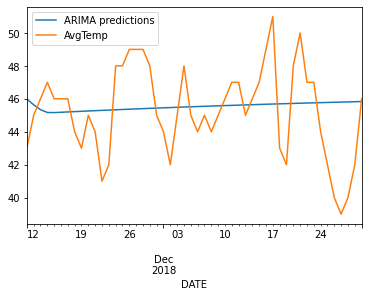

In [39]:
start = len(train)
end = len(train)+len(test)-1
pred = model.predict(start=start, end=end, typ='levels').rename('ARIMA predictions')
pred.plot(legend=True)
test['AvgTemp'].plot(legend=True)
plt.show()

In [41]:
print("Average Temperature:", test['AvgTemp'].mean())

Average Temperature: 45.28


In [42]:
# Getting the root mean squared error:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(pred,test['AvgTemp']))
print("RMSE =", rmse)

RMSE = 2.750223344426025


In [44]:
# Model for predicting future values
pred_model = ARIMA(data['AvgTemp'], order=(1,0,5)) 
pred_model = pred_model.fit()
print(data.tail())

            MinTemp  MaxTemp  AvgTemp
DATE                                 
2018-12-26     35.0     45.0     40.0
2018-12-27     33.0     44.0     39.0
2018-12-28     33.0     47.0     40.0
2018-12-29     36.0     47.0     42.0
2018-12-30     39.0     52.0     46.0


In [45]:
# Predicting future values:
start = len(data)
end = len(data) + 30
index_future_dates = pd.date_range(start='2018-12-30', end='2019-01-29')
pred = pred_model.predict(start=start, end=end, typ='levels').rename('ARIMA Predictions')
pred.index = index_future_dates
print(pred)

2018-12-30    46.422722
2018-12-31    46.118450
2019-01-01    45.627801
2019-01-02    45.257945
2019-01-03    45.120144
2019-01-04    45.139903
2019-01-05    45.159386
2019-01-06    45.178595
2019-01-07    45.197535
2019-01-08    45.216210
2019-01-09    45.234623
2019-01-10    45.252778
2019-01-11    45.270678
2019-01-12    45.288328
2019-01-13    45.305730
2019-01-14    45.322888
2019-01-15    45.339805
2019-01-16    45.356486
2019-01-17    45.372933
2019-01-18    45.389149
2019-01-19    45.405138
2019-01-20    45.420902
2019-01-21    45.436446
2019-01-22    45.451772
2019-01-23    45.466883
2019-01-24    45.481782
2019-01-25    45.496472
2019-01-26    45.510957
2019-01-27    45.525238
2019-01-28    45.539319
2019-01-29    45.553203
Freq: D, Name: ARIMA Predictions, dtype: float64


**Inference from the prediction:** 

The 50 test predictions are areound 45, similar to the average temperature value.

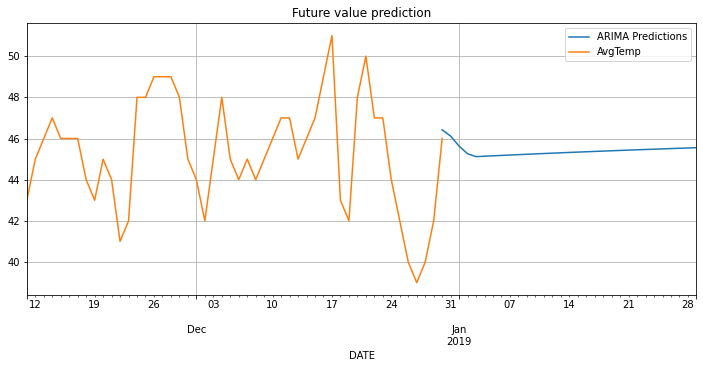

In [60]:
# Plotting the predicted future values:
plt.title("Future value prediction")
pred.plot(figsize=(12,5), legend=True, grid=True)
test['AvgTemp'].plot(legend=True, grid=True)
plt.show()